In [2]:
import os
import glob
import tqdm
import scipy
import matplotlib
import numpy as np
import pandas as pd
import nibabel as nb
from itertools import compress
import matplotlib.pyplot as plt

# Correlate response profiles in cerebellum vs cortex

## All conditions

In [63]:
import matplotlib.colors as mc
print(mc.to_rgba('#B22223'))
print(mc.to_rgba('#EE8080'))
print(mc.to_rgba('#FFE3E1'))

(0.6980392156862745, 0.13333333333333333, 0.13725490196078433, 1.0)
(0.9333333333333333, 0.5019607843137255, 0.5019607843137255, 1.0)
(1.0, 0.8901960784313725, 0.8823529411764706, 1.0)


In [3]:
results_versions1 = [
    # 'mROI_0.1_language_standard',
    # 'mROI_0.1_language_standardAVERAGEDLH_lang',
    # 'mROI_0.1_language_standard',
    # 'mROI_0.1_language_standardAVERAGEDLH_lang',
    # 'mROI_0.1_language_standard',
    # 'mROI_0.1_language_standardAVERAGEDLH_lang'
    # 'mROI_0.1_language_standardAVERAGEDRH_lang'
    'mROI_0.1_language_standardAVERAGEDRH_lang'
] # done in pairs
results_versions2 = [
    # 'mROI_0.1_GSS_percentile-whole-brain_0.1_0.1',
    # 'mROI_0.1_GSS_percentile-whole-brain_0.1_0.1',
    # 'mROI_0.1_symmetrical_GSS_percentile-whole-brain_0.1_0.1',
    # 'mROI_0.1_symmetrical_GSS_percentile-whole-brain_0.1_0.1',
    # 'mROI_0.1_GSS_percentile-ROI-level_0.2_0.1',
    # 'mROI_0.1_GSS_percentile-ROI-level_0.2_0.1'
    # 'mROI_0.1_symmetrical_GSS_percentile-whole-brain_0.1_0.1',
    'mROI_0.1_GSS_percentile-ROI-level_0.2_0.1'
]
# colors = [
#         np.array([[0.15,0.15,0.15,1],
#                   [0.35,0.35,0.35,1],
#                   [0.55,0.55,0.55,1],
#                   [0.75,0.75,0.75,1]]),
#         np.array([[0.15,0.15,0.15,1],
#                   [0.35,0.35,0.35,1],
#                   [0.55,0.55,0.55,1],
#                   [0.75,0.75,0.75,1]]),
#         np.array([[0.15,0.15,0.15,1],
#                   [0.35,0.35,0.35,1],
#                   [0.55,0.55,0.55,1],
#                   [0.75,0.75,0.75,1]]),
#         ['#B22223',
#          '#EE8080',
#          '#FFE3E1'],
#         ['#B22223',
#          '#EE8080',
#          '#FFE3E1'],
#         ['#541E2C',
#          '#541E2C'],
#         ['#FF011F',
#          '#FF011F'],
#         ['#0000FE',
#          '#0000FE'],
#         ['#00C200',
#          '#00C200'],
#         ['#FFFF1D',
#          '#FFFF1D'],
#         ['#FFCA2B',
#          '#FFCA2B'], 
#         ['#FF821F',
#          '#FF821F'],
#         ['#FF0084',
#          '#FF0084'],
#         ['#5D69B4',
#          '#677FA3',
#          '#5C8FAD',
#          '#55915D',
#          '#A0CE9F'],
#         ['#8B7192',
#          '#B399C7',
#          '#C4A7D8',
#          '#D2BEE7'],
#         ['#EA88C6',
#          '#72DDE1',
#          '#78DD00',
#          '#E99000',
#          '#E9DB37'],
#         ['#343FB6',
#          '#C0C0FF'], # '#B0453B','#F5ACAC',
#         ['#343FB6',
#          '#C0C0FF'], # '#B0453B','#F5ACAC',
#         ['#343FB6',
#          '#C0C0FF'] # '#B0453B','#F5ACAC',
# ]
# colors = [item for c_expt in colors for item in c_expt]
# colors = [tuple(int(item.lstrip('#')[i:i+2], 16)/256 for i in (0, 2, 4)) if type(item)==str else tuple(item) for item in colors]
colors = [
    np.array([[0.15,0.15,0.15,1],
                  [0.35,0.35,0.35,1],
                  [0.55,0.55,0.55,1],
                  [0.75,0.75,0.75,1]]),
        np.array([[0.15,0.15,0.15,1],
                  [0.35,0.35,0.35,1],
                  [0.55,0.55,0.55,1],
                  [0.75,0.75,0.75,1]]),
        np.array([[0.15,0.15,0.15,1],
                  [0.35,0.35,0.35,1],
                  [0.55,0.55,0.55,1],
                  [0.75,0.75,0.75,1]]),
        np.array([(0.6980392156862745, 0.13333333333333333, 0.13725490196078433, 1.0),
                  (0.9333333333333333, 0.5019607843137255, 0.5019607843137255, 1.0),
                  (1.0, 0.8901960784313725, 0.8823529411764706, 1.0)]),
        np.array([(0.6980392156862745, 0.13333333333333333, 0.13725490196078433, 1.0),
                  (0.9333333333333333, 0.5019607843137255, 0.5019607843137255, 1.0),
                  (1.0, 0.8901960784313725, 0.8823529411764706, 1.0)]),
        np.array([(1.0, 0.5215686274509804, 0.0, 1.0),
                  (1.0, 0.5215686274509804, 0.0, 0.2)]),
        np.array([(0.35294117647058826, 0.09411764705882353, 0.6039215686274509, 1.0),
                  (0.35294117647058826, 0.09411764705882353, 0.6039215686274509, 0.2),]),
        np.array([(0.35294117647058826, 0.09411764705882353, 0.6039215686274509, 0.93),
                  (0.35294117647058826, 0.09411764705882353, 0.6039215686274509, 0.2),]),
        np.array([(0.35294117647058826, 0.09411764705882353, 0.6039215686274509, 0.86),
                  (0.35294117647058826, 0.09411764705882353, 0.6039215686274509, 0.2),]),
        np.array([(0.35294117647058826, 0.09411764705882353, 0.6039215686274509, 0.79),
                  (0.35294117647058826, 0.09411764705882353, 0.6039215686274509, 0.2),]),
        np.array([(0.35294117647058826, 0.09411764705882353, 0.6039215686274509, 0.72),
                  (0.35294117647058826, 0.09411764705882353, 0.6039215686274509, 0.2),]),
        np.array([(0.35294117647058826, 0.09411764705882353, 0.6039215686274509, 0.65),
                  (0.35294117647058826, 0.09411764705882353, 0.6039215686274509, 0.2),]),
        np.array([(0.12549019607843137, 0.5450980392156862, 0.22745098039215686, 1.0),
                  (0.12549019607843137, 0.5450980392156862, 0.22745098039215686, 0.2)]),
        np.array([(0.12549019607843137, 0.5450980392156862, 0.22745098039215686, 0.9),
                  (0.12549019607843137, 0.5450980392156862, 0.22745098039215686, 0.8),
                  (0.12549019607843137, 0.5450980392156862, 0.22745098039215686, 0.7),
                  (0.12549019607843137, 0.5450980392156862, 0.22745098039215686, 0.2),
                  (0.12549019607843137, 0.5450980392156862, 0.22745098039215686, 0.2)]),
        np.array([(0.00392156862745098, 0.592156862745098, 0.9647058823529412, 1.0),
                  (0.00392156862745098, 0.592156862745098, 0.9647058823529412, 0.9),
                  (0.00392156862745098, 0.592156862745098, 0.9647058823529412, 0.2),
                  (0.00392156862745098, 0.592156862745098, 0.9647058823529412, 0.2),
                  (0.00392156862745098, 0.592156862745098, 0.9647058823529412, 0.2)]),
        np.array([(0.03529411764705882, 0.047058823529411764, 0.6078431372549019, 1.0),
                  (0.03529411764705882, 0.047058823529411764, 0.6078431372549019, 0.9),
                  (0.03529411764705882, 0.047058823529411764, 0.6078431372549019, 0.8),
                  (0.03529411764705882, 0.047058823529411764, 0.6078431372549019, 0.7)]),
        np.array([(0.26666666666666666, 0.8117647058823529, 0.796078431372549, 1.0),
                  (0.26666666666666666, 0.8117647058823529, 0.796078431372549, 0.2)]), # '#343FB6','#C0C0FF'
        np.array([(0.26666666666666666, 0.8117647058823529, 0.796078431372549, 1.0),
                  (0.26666666666666666, 0.8117647058823529, 0.796078431372549, 0.2)]), # '#343FB6','#C0C0FF'
        np.array([(0.26666666666666666, 0.8117647058823529, 0.796078431372549, 1.0),
                  (0.26666666666666666, 0.8117647058823529, 0.796078431372549, 0.2)]), # '#343FB6','#C0C0FF'
]
colors = [item for c_expt in colors for item in c_expt]
colors = [item if type(item)==tuple else tuple(item) for item in colors]
shapes = [
    ["^"]*4,
    ["^"]*4,
    ["^"]*4,
    ["^"]*3,
    ["^"]*3,
    ["o"]*2,
    ["o"]*2,
    ["o"]*2,
    ["o"]*2,
    ["o"]*2,
    ["o"]*2,
    ["o"]*2,
    ["o"]*2,
    ["o"]*5,
    ["o"]*4,
    ["o"]*5,
    ["o"]*2,
    ["o"]*2,
    ["o"]*2
]
shapes = [item for s_expt in shapes for item in s_expt]
s1 = '^'
s2 = 'o'
conds_to_exclude = [[],['SWJNV2_S','SWJN_deluxe_S','Nlength_con2_S',
                        'SWJNV2_N','SWJN_deluxe_N','Nlength_con2_N']] # 'EventsRev_Sent_Sem','EventsOrig_Sent_Sem','events2move_Sent_Sem'
conds_to_exclude_labels = ['','_excluded_SNcomp']

In [4]:
# all scatter plots separately
for figure in ['ALL_CONDITIONS']:
    for version1, version2 in zip(results_versions1,results_versions2):

        if 'AVERAGED' in version1:
            suffix = '_averaged_over_'+version1.split('AVERAGED')[-1]+'_rois'
            version1 = version1.split('AVERAGED')[0]
        else:
            suffix = ''

        for exclude,exclude_label in zip(conds_to_exclude,conds_to_exclude_labels):
            
            # load data
            data1 = pd.read_csv('_data/'+figure+'/'+version1+'_'+figure+'_source_data_mean'+suffix+'.csv')
            data2 = pd.read_csv('_data/'+figure+'/'+version2+'_'+figure+'_source_data_mean.csv')
            data = pd.concat([data1,data2])
            nROIs1 = data1.shape[0]
            nROIs2 = data2.shape[0]
            nROIs = nROIs1+nROIs2
            ROIlabels = pd.unique(data['Unnamed: 0'])
            if exclude:
                colors_to_use = [colors[i-1] for i in np.arange(1,data.shape[1]) if data.columns[i] not in exclude]
                shapes_to_use = [shapes[i-1] for i in np.arange(1,data.shape[1]) if data.columns[i] not in exclude]
            else:
                colors_to_use = colors
                shapes_to_use = shapes

            exclude.append('Unnamed: 0')
            data = data.drop(columns=exclude)

            # load SEM
            sem1 = pd.read_csv('_data/'+figure+'/'+version1+'_'+figure+'_source_data_sem'+suffix+'.csv')
            sem2 = pd.read_csv('_data/'+figure+'/'+version2+'_'+figure+'_source_data_sem.csv')
            sem = pd.concat([sem1,sem2])
            sem = sem.drop(columns=exclude)
    
            for r1,roi1 in enumerate(ROIlabels):
                for r2,roi2 in enumerate(ROIlabels):
    
                    # plot
                    plt.ioff()
                    plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
                    plt.rc('font',**{'family':'sans-serif'})
                    plt.rc('pdf', **{'fonttype':42})
                    fig,ax = plt.subplots(figsize=(8,8))
                    fig.subplots_adjust(hspace=0.2, wspace=0.2)
        
                    x = data.iloc[r1,:].values
                    y = data.iloc[r2,:].values
                    xerr = sem.iloc[r1,:].values
                    yerr = sem.iloc[r2,:].values

                    for p in range(0,x.shape[0]):
                        lines, _, bars = ax.errorbar(x[p],y[p],xerr=xerr[p],yerr=yerr[p],marker=shapes_to_use[p],linestyle='none',markersize=15,alpha=colors_to_use[p][3],elinewidth=3,color=colors_to_use[p])
                        [bar.set_alpha(0.25) for bar in bars]
                        
                    # dashed fit line
                    slope, intercept, r, p, _ = scipy.stats.linregress(x,y)
                    f = lambda a : slope*a + intercept
                    xlim = ax.get_xlim()
                    xvals = np.arange(xlim[0],xlim[1],0.001)
                    yvals = f(xvals)
                    ax.plot(xvals,yvals,'--k',linewidth=3)
                    
                    # label plot with significance
                    if (p < 1e-10):
                        p_string = '<1e-10'
                        xshift = 0.143
                    else:
                        p_string = "{:.3e}".format(p)
                        xshift = 0.13
                    sig_label1 = 'r = ' + str(round(r,3))
                    sig_label2 = '(p = ' + p_string + ')'
                    ax.annotate(text=sig_label1, xy =(0.15,0.8), xycoords='axes fraction', 
                                fontsize=14, weight="heavy")
                    ax.annotate(text=sig_label2, xy =(xshift,0.75), xycoords='axes fraction', 
                                fontsize=12)
                    
                    # set title and axis labels
                    ax.set_xlabel(roi1,fontsize=14)
                    ax.set_ylabel(roi2,fontsize=14)
    
                    # save plot
                    PLOT_DIR = os.path.join('_plots',figure,'correlations',version1+suffix+'_vs_'+version2)
                    if not os.path.exists(PLOT_DIR):
                        os.makedirs(PLOT_DIR)
                    save_filename = PLOT_DIR+'/'+roi1+'_vs_'+roi2+exclude_label+'_uniform_colors.pdf'
                    plt.savefig(save_filename,format='pdf',bbox_inches='tight',pad_inches=0.5) 
                    plt.close()

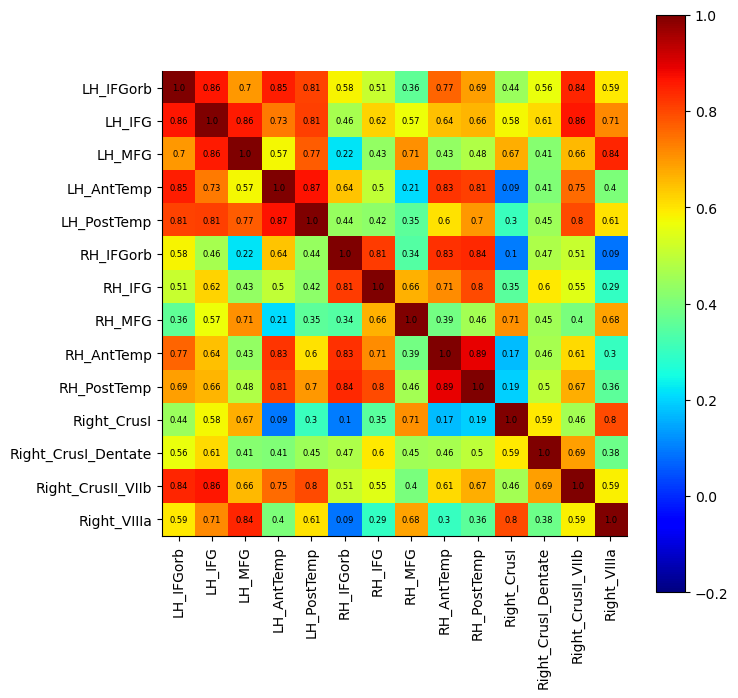

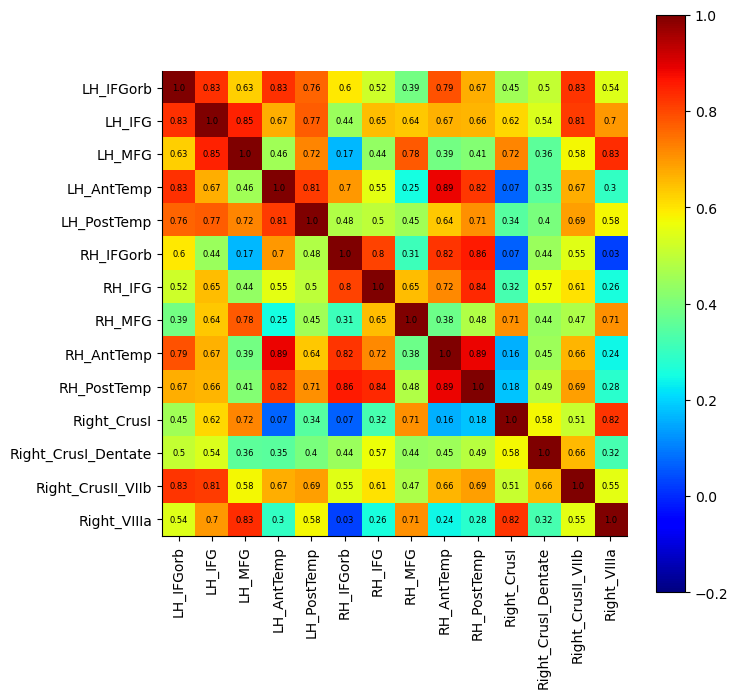

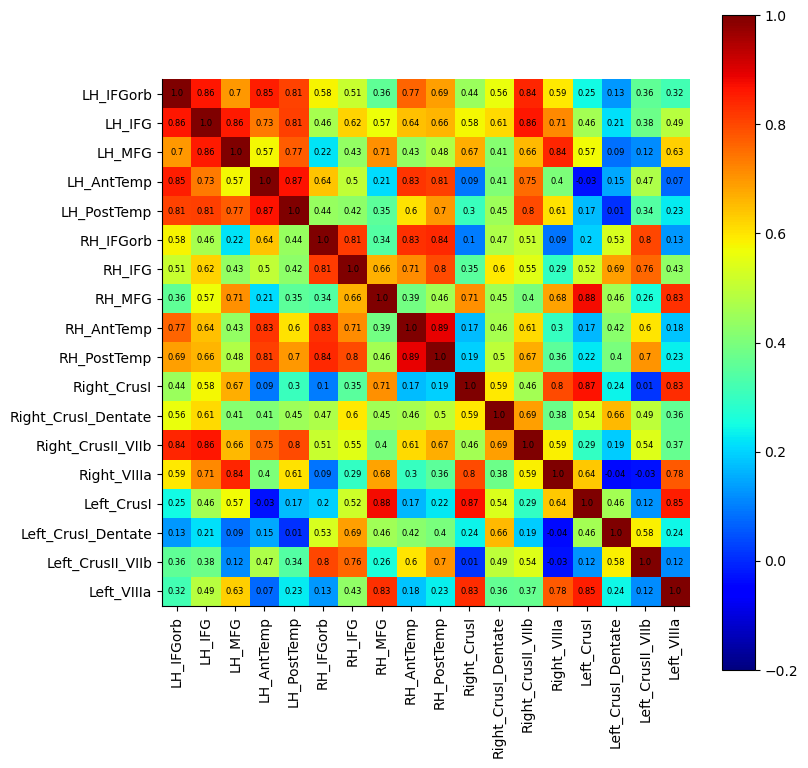

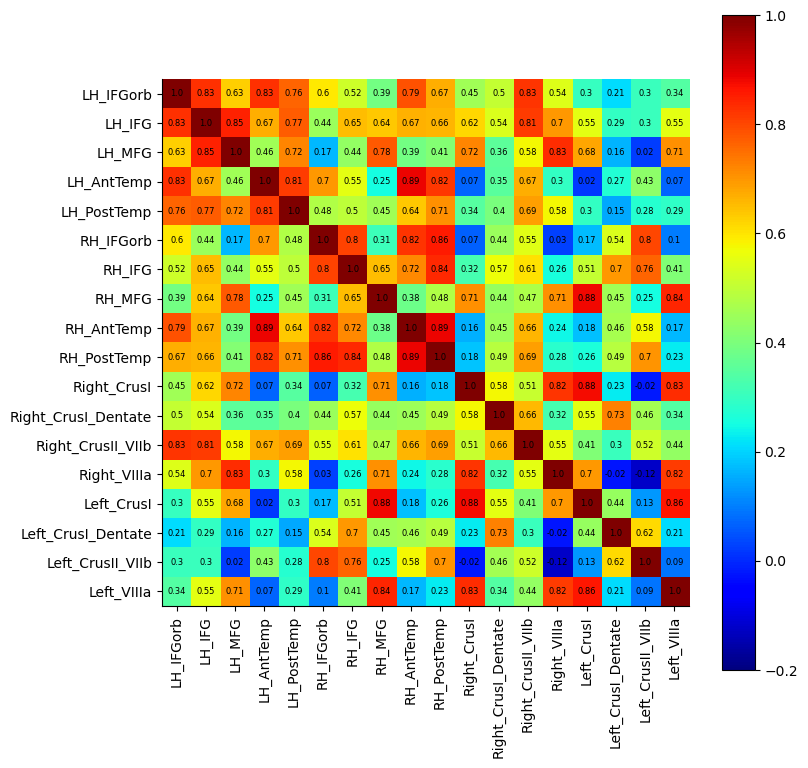

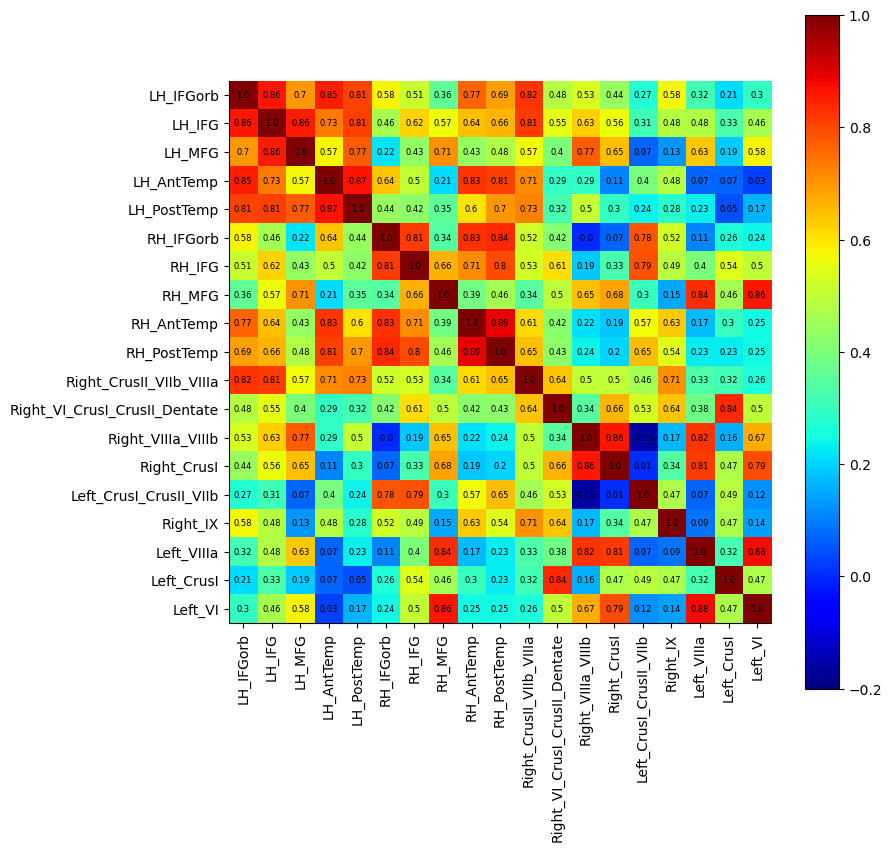

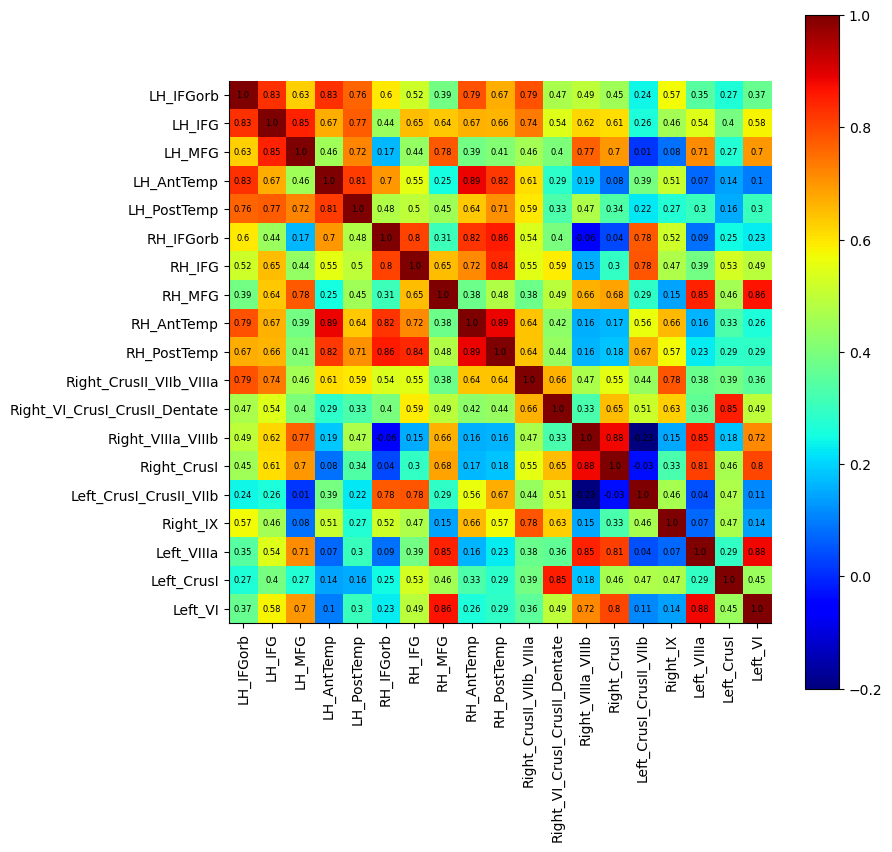

In [9]:
# plot correlation heatmaps
for figure in ['ALL_CONDITIONS']:
    for version1, version2 in zip(results_versions1,results_versions2):

        if 'AVERAGED' in version1:
            suffix = '_averaged_over_'+version1.split('AVERAGED')[-1]+'_rois'
            version1 = version1.split('AVERAGED')[0]
        else:
            suffix = ''

        for exclude,exclude_label in zip(conds_to_exclude,conds_to_exclude_labels):
            
            # load data
            DATA_DIR = os.path.join('_data',figure)
            data = pd.read_csv(DATA_DIR+'/'+version1+suffix+'_vs_'+version2+'_correlations'+exclude_label+'.csv',index_col=0)
            if ('LH_AngG' in data.columns) | ('RH_AngG' in data.columns):
                data = data.drop(columns=['LH_AngG','RH_AngG'])
                data = data.drop(index=['LH_AngG','RH_AngG'])
            if (version1=='mROI_0.1_language_standard') & (version2=='mROI_0.1_GSS_percentile-whole-brain_0.1_0.1'): # reorder cerebellum ROIs
                columns = data.columns
                columns = columns[np.append(np.arange(0,10),[13,11,10,12])]
                data = data.reindex(columns=columns, index=columns)
            elif (version1=='mROI_0.1_language_standard') & (version2=='mROI_0.1_symmetrical_GSS_percentile-whole-brain_0.1_0.1'): # reorder cerebellum ROIs
                columns = data.columns
                columns = columns[np.append(np.arange(0,10),[13,11,10,12,17,15,14,16])]
                data = data.reindex(columns=columns, index=columns)
            else:
                columns = data.columns
            data_vals = data.values
            nROIs = data.shape[0]
        
            # plot
            plt.ion()
            plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
            plt.rc('font',**{'family':'sans-serif'})
            plt.rc('pdf', **{'fonttype':42})
            fig,ax = plt.subplots(figsize=(0.25*nROIs+4,0.25*nROIs+4))
            fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
            plt.imshow(data_vals,cmap='jet',vmin = -0.2,vmax = 1)
            plt.colorbar()
            ax.set_xticks(np.arange(0,nROIs),columns,fontsize=10,rotation=90)
            ax.set_yticks(np.arange(0,nROIs),columns,fontsize=10)
    
            for i in range(0,nROIs):
                for j in range(0,nROIs):
                    ax.text(i,j,round(data_vals[i,j],2),ha='center',va='center',fontsize=6)
            
            # save plot
            PLOT_DIR = os.path.join('_plots',figure,'correlations')
            save_filename = PLOT_DIR+'/'+version1+suffix+'_vs_'+version2+'_correlations_heatmap'+exclude_label+'.pdf'
            plt.savefig(save_filename,format='pdf',bbox_inches='tight',pad_inches=0.5)

In [11]:
lang_LH = ['LH_IFGorb','LH_IFG','LH_MFG','LH_AntTemp','LH_PostTemp']
lang_RH = ['RH_IFGorb','RH_IFG','RH_MFG','RH_AntTemp','RH_PostTemp']
cereb_RH = ['Right_CrusII_VIIb','Right_CrusI_Dentate','Right_VIIIa','Right_CrusI']
cereb_LH = ['Left_CrusII_VIIb','Left_CrusI_Dentate','Left_VIIIa','Left_CrusI']
MD_LH = ['LH_postParietal','LH_midParietal','LH_antParietal','LH_supFrontal','LH_Precentral_A_precG','LH_Precentral_B_IFGop','LH_midFrontal','LH_midFrontalOrb','LH_insula','LH_medialFrontal']

In [12]:
data

,LH_IFGorb,LH_IFG,LH_MFG,LH_AntTemp,LH_PostTemp,RH_IFGorb,RH_IFG,RH_MFG,RH_AntTemp,RH_PostTemp,Right_CrusII_VIIb_VIIIa,Right_VI_CrusI_CrusII_Dentate,Right_VIIIa_VIIIb,Right_CrusI,Left_CrusI_CrusII_VIIb,Right_IX,Left_VIIIa,Left_CrusI,Left_VI
LH_IFGorb,1.000000,0.831033,0.627217,0.829999,0.764473,0.595195,0.521257,0.385975,0.786979,0.667910,0.788507,0.468834,0.494617,0.454359,0.243816,0.572272,0.345831,0.265980,0.370217
LH_IFG,0.831033,1.000000,0.846449,0.670558,0.770460,0.444826,0.648873,0.635886,0.665006,0.658484,0.735578,0.542981,0.619489,0.607868,0.263790,0.456721,0.544233,0.395169,0.578648
LH_MFG,0.627217,0.846449,1.000000,0.455137,0.721182,0.166019,0.436792,0.779106,0.387773,0.411162,0.460620,0.401629,0.769705,0.698070,0.013095,0.081696,0.713981,0.271453,0.698637
LH_AntTemp,0.829999,0.670558,0.455137,1.000000,0.812802,0.696375,0.553449,0.252005,0.886063,0.820311,0.608611,0.285494,0.185589,0.082584,0.394195,0.512294,0.072423,0.142855,0.098392
LH_PostTemp,0.764473,0.770460,0.721182,0.812802,1.000000,0.478838,0.495799,0.452164,0.636476,0.708214,0.592581,0.333766,0.472184,0.337826,0.224426,0.269494,0.302232,0.156178,0.302904
RH_IFGorb,0.595195,0.444826,0.166019,0.696375,0.478838,1.000000,0.804738,0.309290,0.824819,0.858243,0.537238,0.396769,-0.059502,0.036461,0.776887,0.520860,0.085755,0.246227,0.230385
RH_IFG,0.521257,0.648873,0.436792,0.553449,0.495799,0.804738,1.000000,0.652095,0.716675,0.837965,0.549134,0.589473,0.151972,0.296412,0.781971,0.473611,0.386283,0.527396,0.493594
RH_MFG,0.385975,0.635886,0.779106,0.252005,0.452164,0.309290,0.652095,1.000000,0.379641,0.479422,0.380891,0.491632,0.662890,0.683962,0.288389,0.145369,0.849402,0.458364,0.864497
RH_AntTemp,0.786979,0.665006,0.387773,0.886063,0.636476,0.824819,0.716675,0.379641,1.000000,0.886070,0.641885,0.423796,0.158727,0.168878,0.561377,0.656632,0.164295,0.333945,0.260948
RH_PostTemp,0.667910,0.658484,0.411162,0.820311,0.708214,0.858243,0.837965,0.479422,0.886070,1.000000,0.642890,0.440585,0.164012,0.182364,0.669538,0.571301,0.228190,0.287019,0.289285


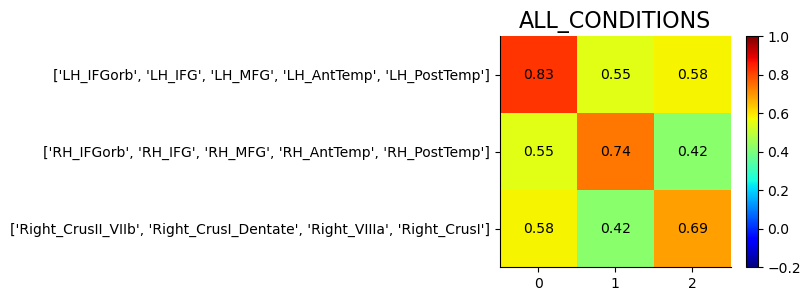

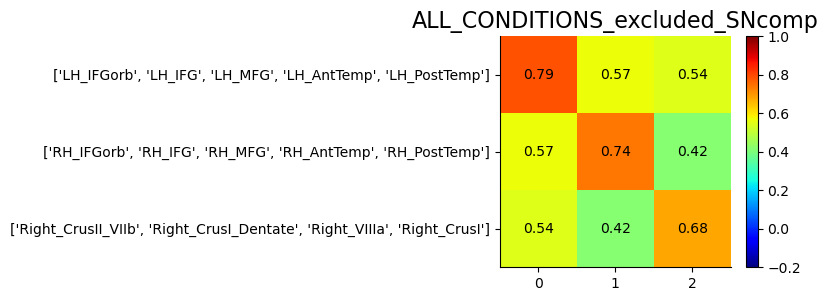

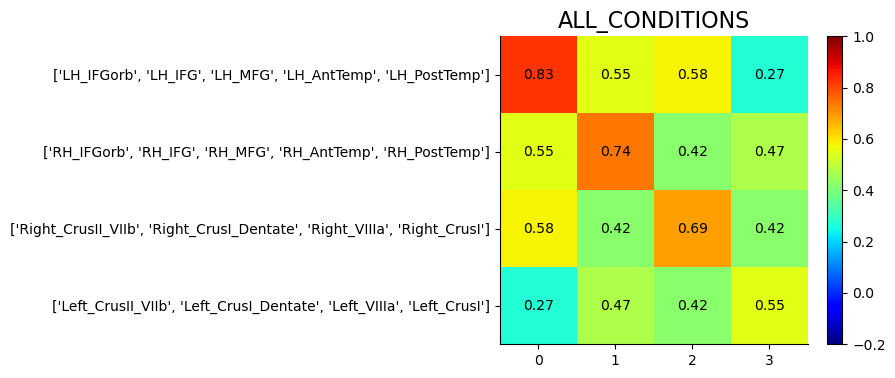

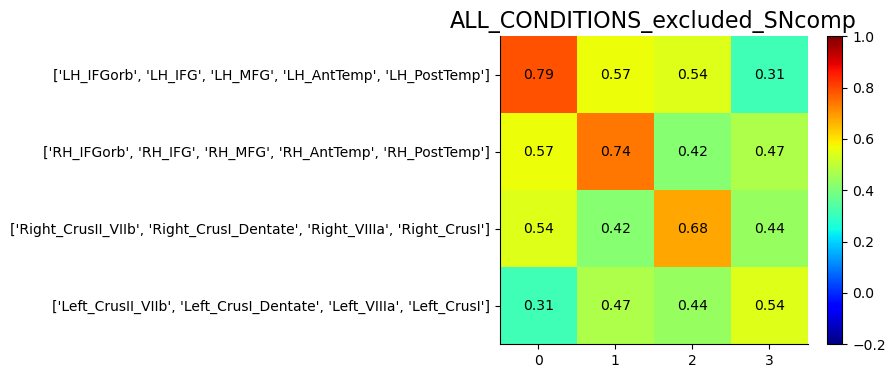

In [13]:
# summary plot
results_versions1 = ['mROI_0.1_language_standard',
                     'mROI_0.1_language_standard']
results_versions2 = ['mROI_0.1_GSS_percentile-whole-brain_0.1_0.1',
                     'mROI_0.1_symmetrical_GSS_percentile-whole-brain_0.1_0.1']
# comparisons = [[lang_LH,lang_LH],
#                [lang_RH,lang_RH],
#                [cereb_RH,cereb_RH],
#                [cereb_LH,cereb_LH],
#                [lang_LH,lang_RH],
#                [lang_LH,cereb_RH],
#                [lang_LH,cereb_LH],
#                [lang_RH,cereb_RH],
#                [lang_RH,cereb_LH],
#                [cereb_RH,cereb_LH]]
# comparison_labels = ['lang_LH_vs_lang_LH',
#                      'lang_RH_vs_lang_RH',
#                      'cereb_RH_vs_cereb_RH',
#                      'cereb_LH_vs_cereb_LH',
#                      'lang_LH_vs_lang_RH',
#                      'lang_LH_vs_cereb_RH',
#                      'lang_LH_vs_cereb_LH',
#                      'lang_RH_vs_cereb_RH',
#                      'lang_RH_vs_cereb_LH',
#                      'cereb_RH_vs_cereb_LH']
comparisons = [[lang_LH,lang_RH,cereb_RH],
               [lang_LH,lang_RH,cereb_RH,cereb_LH]]

for figure in ['ALL_CONDITIONS']:
    for version1, version2, comparison in zip(results_versions1,results_versions2,comparisons):

        if 'AVERAGED' in version1:
            suffix = '_averaged_over_'+version1.split('AVERAGED')[-1]+'_rois'
            version1 = version1.split('AVERAGED')[0]
        else:
            suffix = ''

        for exclude,exclude_label in zip(conds_to_exclude,conds_to_exclude_labels):
            
            # load data
            DATA_DIR = os.path.join('_data',figure)
            data = pd.read_csv(DATA_DIR+'/'+version1+suffix+'_vs_'+version2+'_correlations'+exclude_label+'.csv',index_col=0)
            if ('LH_AngG' in data.columns) | ('RH_AngG' in data.columns):
                data = data.drop(columns=['LH_AngG','RH_AngG'])
                data = data.drop(index=['LH_AngG','RH_AngG'])
                
            # plot
            plt.ion()
            plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
            plt.rc('font',**{'family':'sans-serif'})
            plt.rc('pdf', **{'fonttype':42})
            fig,ax = plt.subplots(figsize=(1+len(comparison),len(comparison)))

            corrs_all = np.zeros((len(comparison),len(comparison)))
            for c1,comparison1 in enumerate(comparison):
                for c2,comparison2 in enumerate(comparison):
                    col_idxs = [True if col in comparison1 else False for col in data.columns]
                    row_idxs = [True if col in comparison2 else False for col in data.columns]
                    assert(np.sum(col_idxs)==len(comparison1))
                    assert(np.sum(row_idxs)==len(comparison2))
                    
                    corrs = data.loc[row_idxs,col_idxs].values
                    corrs_all[c1,c2] = np.mean(corrs)
    
            # plot 
            plt.imshow(corrs_all,cmap='jet',vmin = -0.2,vmax = 1)
            plt.colorbar()
            ax.set_yticks(np.arange(0,len(comparison)),comparison,fontsize=10)
            plt.title(figure+exclude_label,fontsize=16)
    
            for i in range(0,len(comparison)):
                for j in range(0,len(comparison)):
                    ax.text(i,j,round(corrs_all[j,i],2),ha='center',va='center',fontsize=10)
            
            # save plot
            PLOT_DIR = os.path.join('_plots',figure,'correlations')
            save_filename = PLOT_DIR+'/'+version1+suffix+'_vs_'+version2+'_correlations_heatmap'+exclude_label+'_summary.pdf'
            plt.savefig(save_filename,format='pdf',bbox_inches='tight',pad_inches=0.5)
            save_filename = PLOT_DIR+'/'+version1+suffix+'_vs_'+version2+'_correlations_heatmap'+exclude_label+'_summary.svg'
            plt.savefig(save_filename,format='svg',bbox_inches='tight',pad_inches=0.5)